[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nekrut/bda/blob/colab/lectures/lecture4.ipynb)

# Lecture 4: Simple sequence manipulation

[![XKCD353](https://imgs.xkcd.com/comics/python.png)](https://xkcd.com/353/)

> This lecture demonstrates concepts from [Think Python](https://greenteapress.com/wp/think-python-3rd-edition/) chapters 1-3 using biological data.

## DNA as a String

In Python, we can represent a DNA sequence as a **string**—a sequence of characters. Let's start with a short sequence from the *E. coli* genome:

In [1]:
# Store a DNA sequence as a string variable
dna = "ATGCGATCGATCGATCGATCGATCG"

# Display the sequence
dna

'ATGCGATCGATCGATCGATCGATCG'

We can use built-in functions to learn about our sequence:

In [2]:
# What type of data is this?
print(type(dna))

# How long is the sequence?
print(len(dna))

<class 'str'>
25


### String Operations

We can **concatenate** (join) strings using `+` and **repeat** them using `*`:

In [4]:
# Concatenation: joining two sequences
upstream = "TATAAA"    # A promoter motif
gene = "ATGCGATCG"     # Start of a gene

full_sequence = upstream + gene
print("Full sequence:", full_sequence)

# Repetition: creating a poly-A tail
poly_a_tail = "A" * 20
print("Poly-A tail:", poly_a_tail)

Full sequence: TATAAAATGCGATCG
Poly-A tail: AAAAAAAAAAAAAAAAAAAA


## Counting Nucleotides

A fundamental task in sequence analysis is counting how many of each nucleotide (A, T, G, C) appear in a sequence. We can use the `.count()` method:

In [5]:
# A longer sequence to analyze
dna = "ATGCGATCGATCGATCGATCGATCGAATTCCGGAATTCCGG"

# Count each nucleotide
a_count = dna.count('A')
t_count = dna.count('T')
g_count = dna.count('G')
c_count = dna.count('C')

print("A:", a_count)
print("T:", t_count)
print("G:", g_count)
print("C:", c_count)

A: 10
T: 10
G: 11
C: 10


### Verifying Our Counts

The total of all nucleotides should equal the sequence length. Let's use **arithmetic operators** to verify:

In [6]:
# Sum of all counts
total = a_count + t_count + g_count + c_count

print("Sum of counts:", total)
print("Sequence length:", len(dna))
print("Match:", total == len(dna))

Sum of counts: 41
Sequence length: 41
Match: True


## GC Content Calculation

**GC content** is the percentage of nucleotides that are either G or C. This is biologically important because:
- Higher GC content = more stable DNA (3 hydrogen bonds vs 2 for AT)
- GC content varies between species and genomic regions
- Used in gene prediction and genome analysis

Formula: GC% = (G + C) / total × 100

In [7]:
# Calculate GC content
gc_count = g_count + c_count
gc_percent = gc_count / len(dna) * 100

print("GC content:", gc_percent, "%")

GC content: 51.21951219512195 %


We can use `round()` to clean up the output:

In [8]:
# Round to 1 decimal place
gc_percent_rounded = round(gc_percent, 1)

print("GC content:", gc_percent_rounded, "%")

GC content: 51.2 %


The `print()` function can take multiple arguments, separated by spaces:

In [9]:
# Print multiple values
print("Sequence has", len(dna), "nucleotides with", gc_percent_rounded, "% GC content")

Sequence has 41 nucleotides with 51.2 % GC content


## Using the Math Module

Python's `math` module provides mathematical functions. We can use it to calculate **Shannon entropy**—a measure of sequence complexity from information theory.

In [10]:
import math

# The math module provides constants like pi
print("Pi =", math.pi)

# And functions like sqrt and log
print("Square root of 16:", math.sqrt(16))
print("Log base 2 of 8:", math.log2(8))

Pi = 3.141592653589793
Square root of 16: 4.0
Log base 2 of 8: 3.0


### Shannon Entropy of a DNA Sequence

Shannon entropy measures how "random" or "complex" a sequence is. A sequence with equal proportions of A, T, G, C has maximum entropy (2 bits), while a sequence of all A's has entropy of 0.

Formula: H = -Σ p(x) × log₂(p(x))

In [11]:
# Calculate frequencies (proportions)
freq_a = a_count / len(dna)
freq_t = t_count / len(dna)
freq_g = g_count / len(dna)
freq_c = c_count / len(dna)

print("Frequencies:")
print("A:", round(freq_a, 3))
print("T:", round(freq_t, 3))
print("G:", round(freq_g, 3))
print("C:", round(freq_c, 3))

Frequencies:
A: 0.244
T: 0.244
G: 0.268
C: 0.244


In [12]:
# Calculate entropy (handling the case where frequency is 0)
entropy = 0
for freq in [freq_a, freq_t, freq_g, freq_c]:
    if freq > 0:  # log(0) is undefined
        entropy = entropy - freq * math.log2(freq)

print("Shannon entropy:", round(entropy, 3), "bits")
print("Maximum possible:", 2.0, "bits")

Shannon entropy: 1.999 bits
Maximum possible: 2.0 bits


In [13]:
dna

'ATGCGATCGATCGATCGATCGATCGAATTCCGGAATTCCGG'

## Writing Your First Function

A **function** is a reusable block of code. Let's create a function to calculate GC content so we can easily apply it to any sequence:

In [14]:
def gc_content(sequence):
    """
    Calculate GC content as a percentage.

    Args:
        sequence: A DNA sequence string

    Returns:
        GC content as a percentage (0-100)
    """
    g = sequence.count('G')
    c = sequence.count('C')
    return (g + c) / len(sequence) * 100

Let's break down the function:
- `def gc_content(sequence):` — defines the function name and **parameter**
- The docstring (`"""..."""`) explains what the function does
- The body is **indented** (4 spaces)
- `return` specifies what value the function gives back

In [15]:
# Test the function with different sequences
print("Test 1:", gc_content("ATGCATGC"))  # 50%
print("Test 2:", gc_content("GGGGCCCC"))  # 100%
print("Test 3:", gc_content("AAAATTTT"))  # 0%

Test 1: 50.0
Test 2: 100.0
Test 3: 0.0


Now let's create a function for Shannon entropy—wrapping our earlier calculation into a reusable form:

In [16]:
def shannon_entropy(sequence):
    """
    Calculate Shannon entropy of a DNA sequence.

    Args:
        sequence: A DNA sequence string

    Returns:
        Entropy in bits (0 to 2 for DNA)
    """
    length = len(sequence)
    entropy = 0

    for nucleotide in ['A', 'T', 'G', 'C']:
        count = sequence.count(nucleotide)
        if count > 0:
            freq = count / length
            entropy = entropy - freq * math.log2(freq)

    return entropy

In [17]:
# Test the entropy function
print("Test 1 (balanced):", round(shannon_entropy("ATGC"), 3))      # 2.0 - max entropy
print("Test 2 (all A's):", round(shannon_entropy("AAAA"), 3))       # 0.0 - min entropy
print("Test 3 (AT only):", round(shannon_entropy("AATTAATT"), 3))   # 1.0 - half max

Test 1 (balanced): 2.0
Test 2 (all A's): 0.0
Test 3 (AT only): 1.0


## Iterating Through a Sequence

A **for loop** lets us examine each character in a sequence one at a time. Let's implement our own nucleotide counter to understand what `.count()` does internally:

In [19]:
# Print each nucleotide
short_seq = "ATGC"

for nucleotide in short_seq:
    print(nucleotide)

A
T
G
C


In [20]:
# Count G's manually
dna = "ATGCGATCGATCGATCG"

g_count = 0
for nucleotide in dna:
    if nucleotide == 'G':
        g_count = g_count + 1

print("Number of G's:", g_count)
print("Verify with .count():", dna.count('G'))

Number of G's: 5
Verify with .count(): 5


## Functions with Multiple Parameters

Let's create a more flexible counting function that takes both the sequence and the target nucleotide as **parameters**:

In [21]:
def count_nucleotide(sequence, target):
    """
    Count occurrences of a nucleotide in a sequence.

    Args:
        sequence: A DNA sequence string
        target: The nucleotide to count ('A', 'T', 'G', or 'C')

    Returns:
        The count of the target nucleotide
    """
    count = 0
    for nucleotide in sequence:
        if nucleotide == target:
            count = count + 1
    return count

In [22]:
# Test our function
dna = "ATGCGATCGATCGATCG"

print("A count:", count_nucleotide(dna, 'A'))
print("T count:", count_nucleotide(dna, 'T'))
print("G count:", count_nucleotide(dna, 'G'))
print("C count:", count_nucleotide(dna, 'C'))

A count: 4
T count: 4
G count: 5
C count: 4


## Functions Calling Functions

We can build more complex functions by combining simpler ones. Let's rewrite `gc_content` to use our `count_nucleotide` function:

In [23]:
def gc_content_v2(sequence):
    """
    Calculate GC content using our count_nucleotide function.
    """
    g = count_nucleotide(sequence, 'G')
    c = count_nucleotide(sequence, 'C')
    total = len(sequence)
    return (g + c) / total * 100

# Test it
print("GC content:", gc_content_v2("ATGCGATCGATCGATCG"))

GC content: 52.94117647058824


### Local Variables and Scope

Variables created inside a function are **local**—they only exist within that function:

In [29]:
def demo_function():
    local_var = "I only exist inside this function"
    print("Inside function:", local_var)

demo_function()

# This would cause an error:
#print(local_var)  # NameError: name 'local_var' is not defined

Inside function: I only exist inside this function


## Analyzing Multiple Sequences

Let's compare GC content across sequences from different organisms:

In [30]:
# Sample sequences (promoter regions)
sequences = [
    ("E. coli", "ATGCGATCGATCGATCGATCGATCGAATTCCGG"),
    ("Yeast", "ATATATATGCATGCATATATGCATGC"),
    ("Human", "GCGCGCATATATGCGCGCATATGCGC"),
    ("Plasmodium", "ATATATATATATATATATATATAT"),  # Malaria parasite - very AT-rich
]

In [31]:
# Analyze each sequence
print("GC Content Comparison")
print("=" * 40)

for name, seq in sequences:
    gc = gc_content(seq)
    print(name + ":", round(gc, 1), "%")

GC Content Comparison
E. coli: 51.5 %
Yeast: 30.8 %
Human: 61.5 %
Plasmodium: 0.0 %


### Using range() for Numbered Loops

The `range()` function generates a sequence of numbers, useful when you need to count:

In [32]:
# Count from 0 to 4
for i in range(5):
    print("Number:", i)

Number: 0
Number: 1
Number: 2
Number: 3
Number: 4


In [33]:
# Calculate GC content in sliding windows
dna = "ATGCGCGCATATATATGCGCGCATATATAT"
window_size = 10

print("Position\tGC%")
for i in range(len(dna) - window_size + 1):
    window = dna[i:i + window_size]
    gc = gc_content(window)
    print(i, "\t", round(gc, 1))

Position	GC%
0 	 60.0
1 	 60.0
2 	 60.0
3 	 50.0
4 	 40.0
5 	 30.0
6 	 20.0
7 	 20.0
8 	 20.0
9 	 30.0
10 	 40.0
11 	 50.0
12 	 60.0
13 	 60.0
14 	 60.0
15 	 60.0
16 	 60.0
17 	 50.0
18 	 40.0
19 	 30.0
20 	 20.0


## Visualizing GC Content

To create charts, we need two libraries:
- **Pandas** — for organizing data into tables (DataFrames)
- **Altair** — for creating visualizations

In [34]:
import altair as alt
import pandas as pd

The `as` keyword creates a shorter alias: instead of writing `altair.Chart(...)`, we can write `alt.Chart(...)`.

### Building a List of Dictionaries

Before we can plot, we need to organize our results. We'll build a **list of dictionaries** where each dictionary represents one row of data:

In [35]:
# Start with an empty list
data = []

# Loop through each organism and its sequence
for name, seq in sequences:
    # Create a dictionary for this organism
    row = {
        "Organism": name,
        "GC Content (%)": round(gc_content(seq), 1),
        "Shannon Entropy (bits)": round(shannon_entropy(seq), 3)
    }
    # Add it to our list
    data.append(row)

# Look at what we built
data

[{'Organism': 'E. coli',
  'GC Content (%)': 51.5,
  'Shannon Entropy (bits)': 1.998},
 {'Organism': 'Yeast', 'GC Content (%)': 30.8, 'Shannon Entropy (bits)': 1.89},
 {'Organism': 'Human',
  'GC Content (%)': 61.5,
  'Shannon Entropy (bits)': 1.961},
 {'Organism': 'Plasmodium',
  'GC Content (%)': 0.0,
  'Shannon Entropy (bits)': 1.0}]

Each dictionary has the same keys (`"Organism"`, `"GC Content (%)"`, `"Shannon Entropy (bits)"`), which will become column names.

### Converting to a DataFrame

A **DataFrame** is a table—like a spreadsheet. Pandas can convert our list of dictionaries directly into a DataFrame:

In [36]:
# Convert list of dictionaries to a DataFrame
df = pd.DataFrame(data)
df

,Organism,GC Content (%),Shannon Entropy (bits)
0,E. coli,51.5,1.998
1,Yeast,30.8,1.890
2,Human,61.5,1.961
3,Plasmodium,0.0,1.000


### Creating Charts with Altair

Altair uses a **declarative** approach: you describe *what* you want, not *how* to draw it:
- `alt.Chart(df)` — use this DataFrame
- `.mark_bar()` — draw bars
- `.encode(x=..., y=...)` — map columns to visual properties

In [40]:
# GC Content bar chart
gc_chart = alt.Chart(df).mark_bar().encode(
    x="Organism",
    y="GC Content (%)",
    color="Organism"
).properties(
    title="GC Content Comparison",
    width=300,
    height=200
)

In [41]:
# Shannon Entropy chart
se_chart = alt.Chart(df).mark_circle(size=100).encode(
    x="Organism",
    y="Shannon Entropy (bits)",
    color="Organism"
).properties(
    title="Shannon Entropy Comparison",
    width=300,
    height=200
)

Let's put them together:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 31.8 MB/s eta 0:00:00


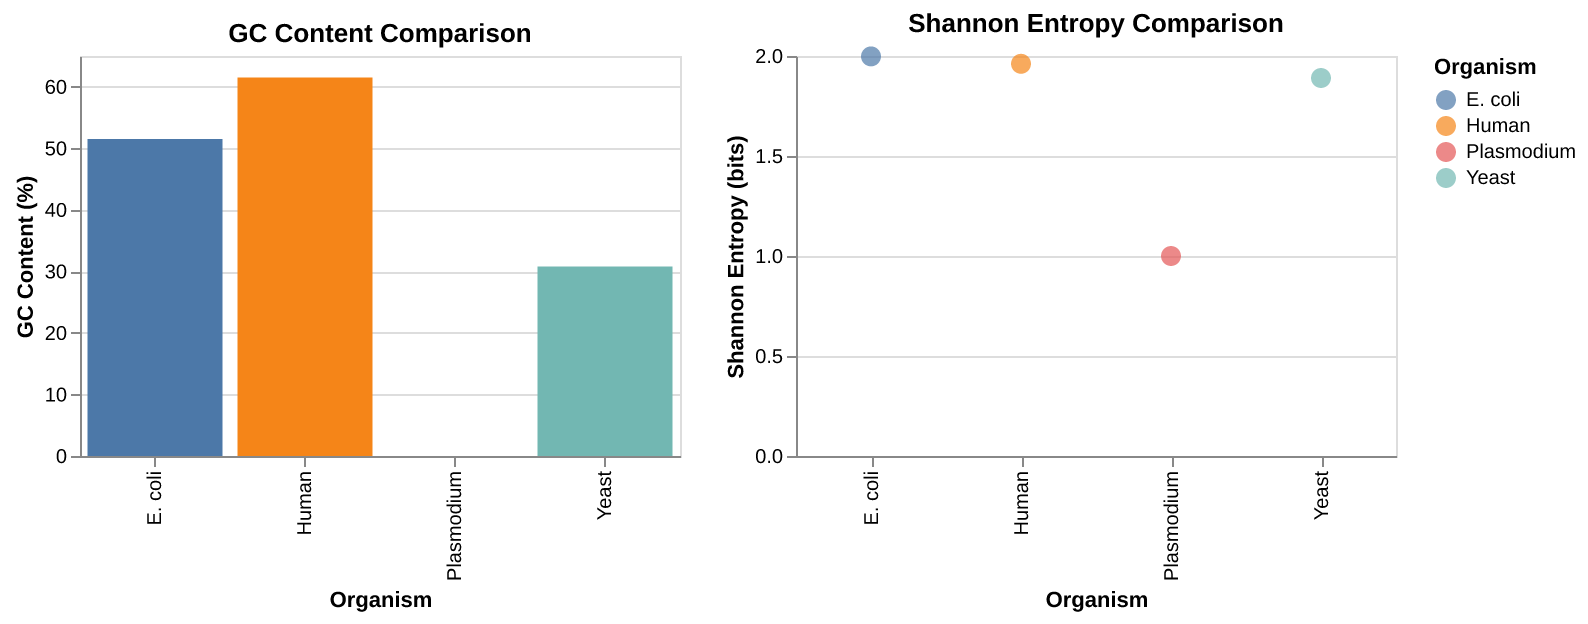

In [43]:
# Combine charts side by side and display
combined = gc_chart | se_chart

# Display as PNG (works in all environments)
import tempfile
from IPython.display import Image

# Install vl-convert-python if not already installed (required for saving PNG)
!pip install vl-convert-python --quiet

with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as f:
    combined.save(f.name, scale_factor=2)
    display(Image(f.name))

## Homework

----

Chapters [5](https://colab.research.google.com/github/AllenDowney/ThinkPython/blob/v3/chapters/chap05.ipynb), [7](https://colab.research.google.com/github/AllenDowney/ThinkPython/blob/v3/chapters/chap07.ipynb), [8](https://colab.research.google.com/github/AllenDowney/ThinkPython/blob/v3/chapters/chap08.ipynb) from "Think Python" 3rd edition